# Movie Recommendation 2022

# INTRODUCTION

In today's incredibly busy environment, recommendation systems are becoming more and more crucial. Due to the duties they must complete in the little time they have, people are always pressed for time. As a result, recommendation systems are crucial since they help people make the best decisions.

A recommendation system basically seeks out content that a particular person might find interesting. Additionally, it takes into account a variety of variables to develop tailored lists of fascinating and helpful information that are unique to each user. Artificial intelligence-based algorithms used in recommendation systems scan through all available options to compile a unique list of options that are interesting and pertinent to a particular user.

These outcomes are determined by the user's profile, search and browsing history, what other people with comparable characteristics and demographics are watching, and your likelihood of seeing those films. Using the available data, this is accomplished through predictive modeling and heuristics.

# Problem statement

Build a recommendation system based on collaborative filtering or material that can accurately anticipate a user's rating of a movie they haven't seen based on past preferences

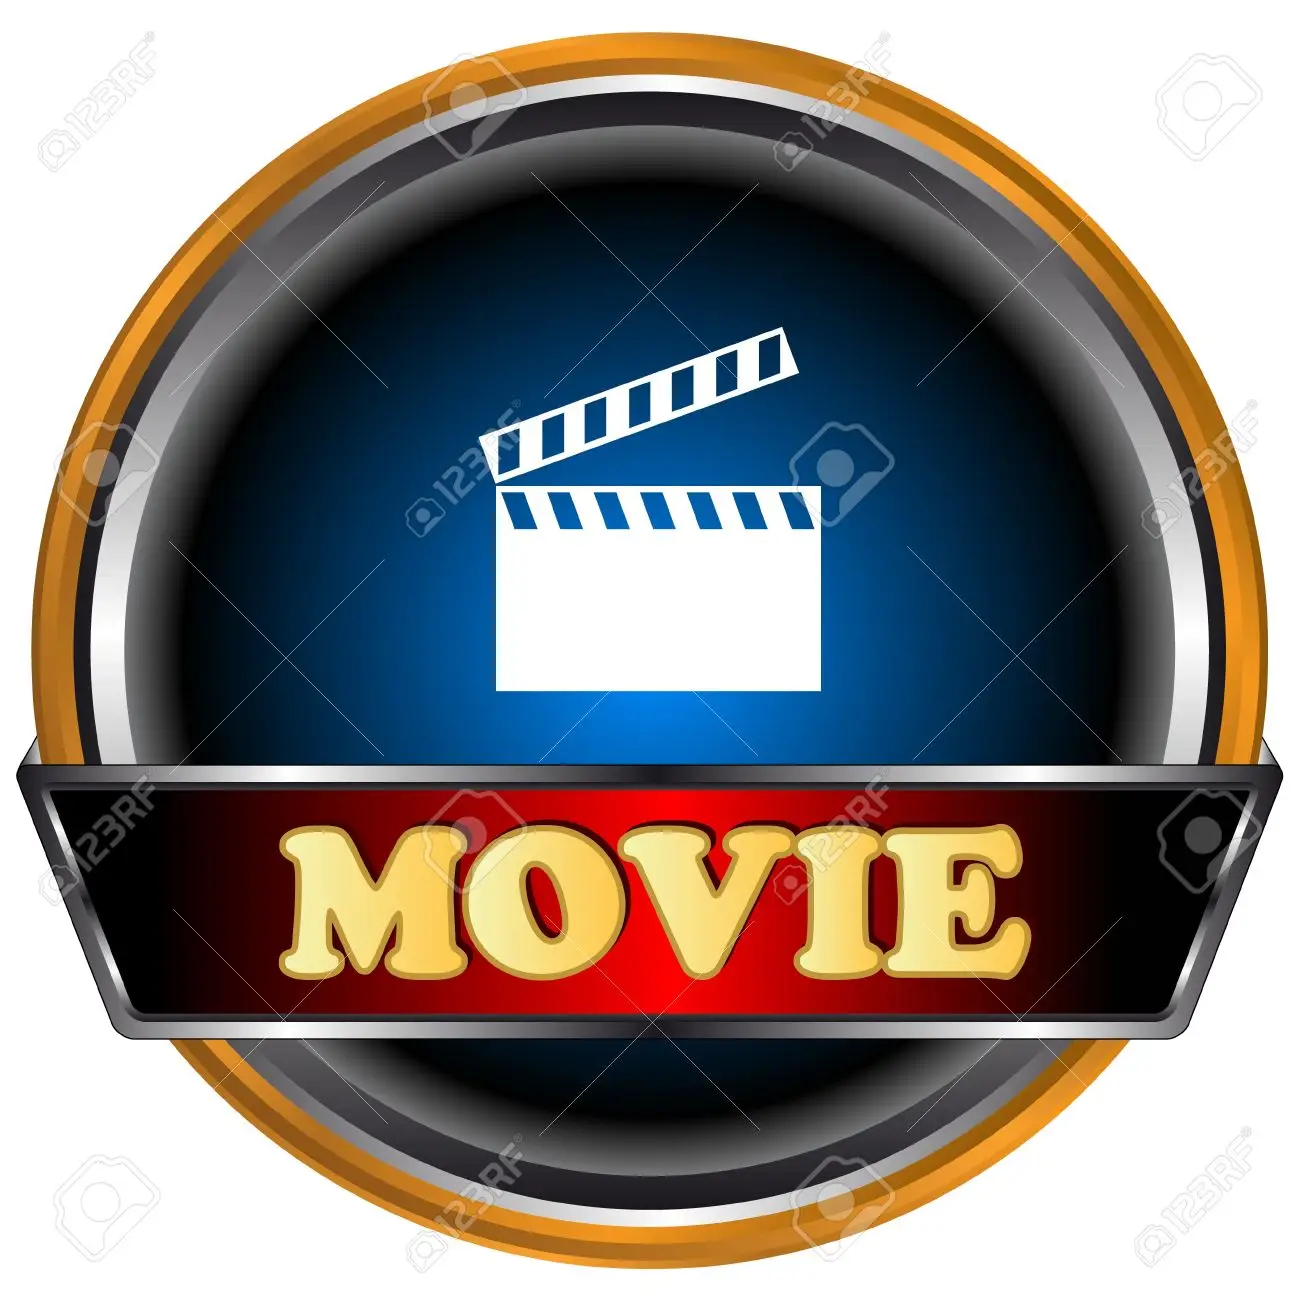

### Table of content

In [ ]:
##### Import libraries
1.loading libraries and dataset
2.Properties of the data
3.Exploratory data analysis
4.Data preparation and cleaning

In [1]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


# 1.Import Libraries

In [122]:
# Import library to save model
import pickle


#libraries for data loading, data manipulation and data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Setting to produce nice plots in a jupyter notebook
##plt.styles.use('fivethirtyeight')
####%matplotlib inline
import seaborn as sns
##from wordcloud import WordClod,STOPWORDS

#Import library for train test split
from sklearn.model_selection import train_test_split

#Packages for modeling
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import CoClustering
from surprise import BaselineOnly

#Packages for Data processing
#from sklearn.feature_extraction.text import TfidVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Packages for model evaluation
##from sklearn.metrics import mean_square_error
##from sklearn.metrics import mean_absolute_error
from surprise import accuracy

In [126]:
from sklearn.preprocessing import StandardScaler

# Reading Data

We will import the dataframes we want to deal with here.

In [121]:
#df_sample_submission
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_movies = pd.read_csv('movies.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv') 
df_genome_scores = pd.read_csv('genome_scores.csv')

# Properties of the data

We must first comprehend our data in order to utilise it in any meaningful way. In order to comprehend the data in each dataframe, we explore it in this part

In [62]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [63]:
df_imdb.shape

(27278, 6)

There are 27 278 rows and 6 columns in the imbd table. The imbd table's rows include a movie ID, along with information about the cast, director, runtime, budget, and narrative keywords for each movie that the movie ID refers to

In [64]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [66]:
len(df_links)

62423

A movie ID, the imdb ID, and the tmdb ID of the film that the movie ID refers to are included in each of the 62 423 rows of the links table.

In [67]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [68]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [69]:
len(df_genome_scores)

15584448

The genome_scores DataFrame has more than 15584448 million rows

In [70]:
df_genome_scores['movieId'].nunique()

13816

In [71]:
df_genome_scores['tagId'].nunique()

1128

Each row of the genome_scores DataFrame contains a movie ID, a tag ID and a relevance score indicating the relevance of the tag referenced by the tag ID to the movie referenced by the movie ID. This data spans 13 816 movies and 1 128 tags

In [72]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [73]:
len(df_tags)

1093360

The tags table includes user-generated tags linked to movies, along with the movie ID, user ID, and the number of seconds since January 1, 1970, when the tag was first made

In [74]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [75]:
df_movies.shape

(62423, 3)

In [76]:
len(df_movies)

62423

In [77]:
df_train.shape

(10000038, 4)

In [78]:
len(df_train)

10000038

In [79]:
df_train['userId'].nunique()

162541

In [80]:
df_train['movieId'].nunique()

48213

In [81]:
df_train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

In [82]:
df_train['rating'].nunique()

10

In [83]:
df_train['movieId'].nunique() < df_movies['movieId'].nunique()

True

The train df DataFrame's 10 000 038 rows each carry a rating (given by a user and pertaining to a movie). 48 213 distinct movies and 162 541 unique users are included in the train df DataFrame. A limited set of 10 values are represented by the ratings

In [84]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [85]:
len(df_test)

5000019

In [86]:
df_test['movieId'].nunique()

39643

In [87]:
df_test['userId'].nunique()

162350

In [88]:
df_test['userId'].nunique() == df_train['userId'].nunique()

False

In [89]:
df_train['userId'].nunique() > df_test['userId'].nunique()

True

# EDA(Exploratory data analysis)

Exploratory data analysis is the term we use to describe the process of analyzing a dataset and enumerating its key characteristics. Before selecting what we want to do with a dataset, EDA focuses on understanding its features.

Visualization tools, such as graphs, plots, and other visualizations, are frequently used in exploratory data analytics.

We start by selecting the movie features we want to investigate and create a new dataframe containing these features,the data is then formatted to make our lives easier when we start with the EDA

In [90]:
df = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(df_movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


### 1.Insights for ratings

#### Top 10 Most rated movies

In [91]:
# Determine the average rating and number of ratings for each movie
ratings_mean_count = pd.DataFrame(ratings.groupby(['title'])[['rating']].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count())
ratings_mean_count['popularity'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count()*ratings.groupby(['title'])['rating'].mean())

NameError: name 'ratings' is not defined

In [92]:
# Extract and display the 10 most popular films in the dataset 
ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
ratings_mean_count.head(10)

NameError: name 'ratings_mean_count' is not defined

From the table above,these are the top 10 most rated movies. The Shawshank Redemption is the most rated movie,it is therefore a fair assumption to assume that it could be the most watched movie in our data set. But lets explore more before making conclusions

### Top 10 Most watched movies

In [93]:
# To find the number of times a user rated a movie
user_df = pd.DataFrame(
    df_train['userId'].value_counts()).reset_index()
user_df.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
user_df.head(10)

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050
5,109731,2671
6,49403,2670
7,92046,2579
8,110971,2288
9,30879,2284


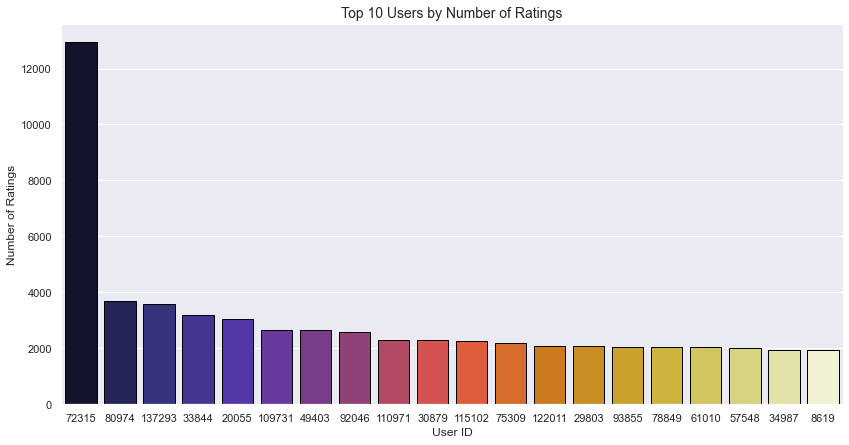

In [94]:
plt.figure(figsize=(14,7))
data = df_train['userId'].value_counts().head(20)
ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
plt.title(f'Top 10 Users by Number of Ratings', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

The above output shows that user the with id 72315 has the highest rating count of 12952

C:\Users\Acer\AppData\Local\Temp/ipykernel_704/621621326.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


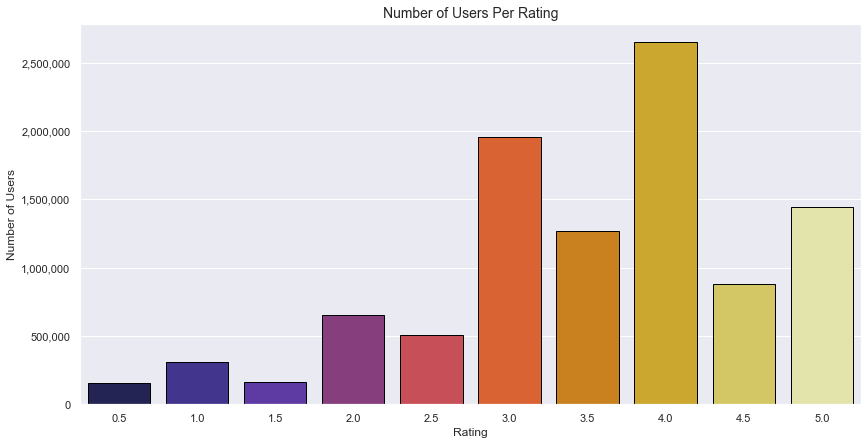

In [95]:
movieRating_Group = df_train['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=movieRating_Group, x='index', y='rating', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRating_Group['rating'].sum())
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

# 2.Insights on genres

#### Most common Genres

In [96]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.tail()

,movieId,genres
112302,209163,Drama
112303,209169,(no genres listed)
112304,209171,Action
112305,209171,Adventure
112306,209171,Drama


In [97]:
index_names = movies_genres[movies_genres['genres']=='(no genres listed)'].index
index2_names = movies_genres[movies_genres['genres']=='IMAX'].index
movies_genres.drop(index_names, inplace = True)
movies_genres.drop(index2_names, inplace = True)
movies_genres.tail()

,movieId,genres
112301,209163,Comedy
112302,209163,Drama
112304,209171,Action
112305,209171,Adventure
112306,209171,Drama


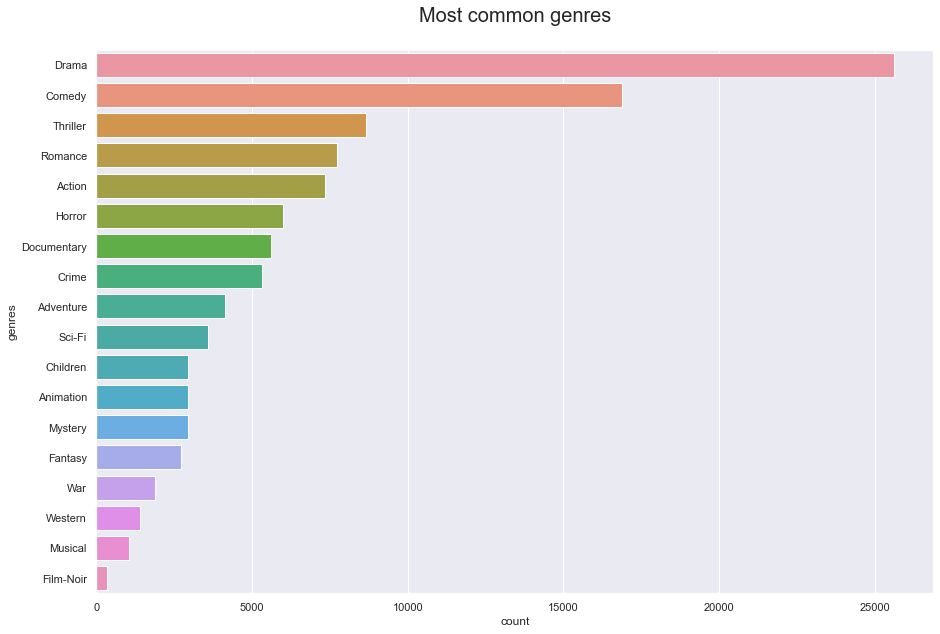

In [98]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index)
plt.show()

There are 17 unique genres Majority of the films fall into the drama, comedy and thriller genres. Dramas account for 23% Comedies makes up 15% of the films 8% of the films fall into the thriller genre The Imax genre accounts for the smallest portion of the films in the dataset at less than 1% since this is a relatively new genre and the dataset goes back 50 years

here is a Word Cloud for the genres

In [99]:
from wordcloud import WordCloud, STOPWORDS

In [100]:
import wordcloud
all_words = ''.join([label for label in movies_genres['genres']])

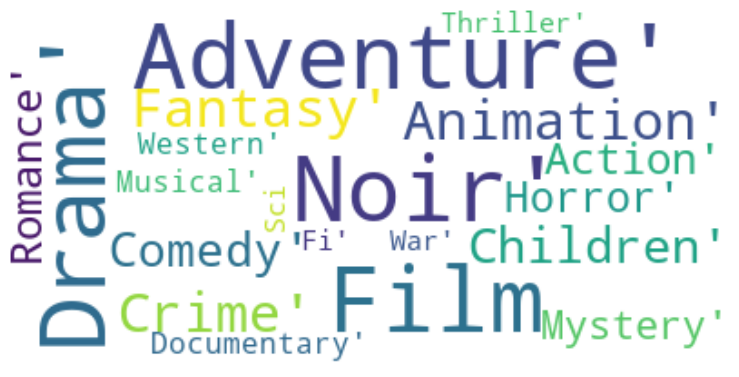

In [101]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
gen = movies_genres['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# 3.Insights on the year of realease

In [102]:
df_movies['year'] = df_movies.title.str.extract("\((\d{4})\)", expand=True)
df_movies.year = pd.to_datetime(df_movies.year, format='%Y')

### Years in which movies were released

Text(0.5, 1.0, 'TOTAL MOVIES RELEASED PER YEAR')

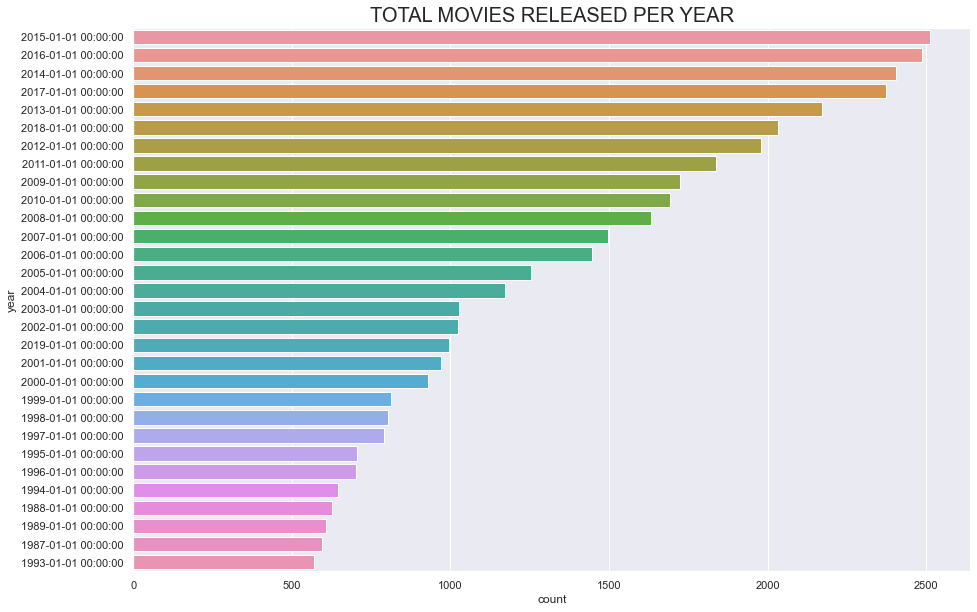

In [103]:
# Plot movies released per year
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=df_movies['year'], data=df_movies, order=df_movies['year'].value_counts().index[0:30])
ax.set_title('TOTAL MOVIES RELEASED PER YEAR', fontsize= 20)

So, 2015 was the year when most of the movies were released.

# 4.Insights on actors

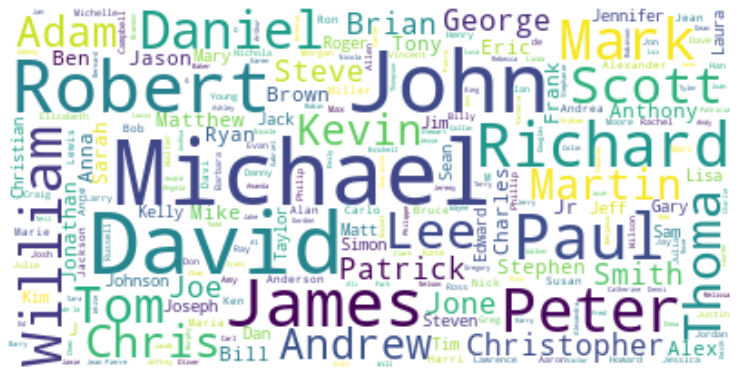

In [104]:
#df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
#all_words2 = ''.join([label for label in movies_genres['genres']])
gen2 = df['title_cast'].explode()
text = list(set(gen2))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=400,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# 5.Insights on directors

In [105]:
def count_directors(df, count = 10):
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    index2_names = directors[directors['director']=='See full summary'].index
    directors.drop(index2_names, inplace = True)
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [106]:
def feature_count(df, column):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x =df['count'] , y= df[f'{column}'], palette='Greens_r')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel('Director')
    plt.show()

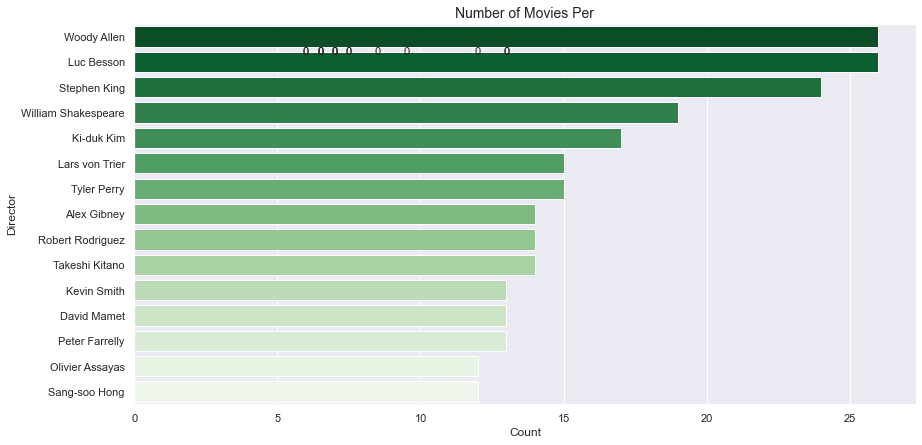

In [107]:
directors = count_directors(df_imdb)
feature_count(directors.head(15), 'director')

Observation:From the bar graph above,we oberserve that the following top 5 directors have the highiest number of movies directed

Woody Allen Luc Besson Stephen King Wiliam Shakespare KI-duk Kim we also see some of the most popular directors that we know like Tyler Perry

# Data Preparation and cleaning

In [108]:
df_train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [109]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

we dont have missing data

In [110]:
train_copy = df_train.copy()
len(train_copy)

10000038

# Data Processing

In [123]:
#Subset the data to cut down computation time for now
df_genome_score = df_genome_scores[:10000000]

In [128]:
#Although scores are in the range of 0-1, there is no harm in scaling
scaler_mds = StandardScaler()
mds_genome = scaler_mds.fit_transform(df_genome_score.sample())

In [129]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1 )

NameError: name 'TSNE' is not defined

In [ ]:
tsne.fit(mds_genome)

In [ ]:
Axes3D

fig = plt.figure(figsize=(15,8))

#add 3D scatter plot
ax = fig.add_subplot(project='3d')
ax.scatter(tsne.embedding_[:,0]. tsne.embedding_[:,1], tsne.embedding_[:,2], color ='#4D17A0')
plt.show()